In [21]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn
import numpy as np
from sklearn.metrics import precision_score , accuracy_score

In [22]:
dataset = pd.read_csv('pipe.csv')
dataset.head()

,material,tomr,cf,c_wave_no,cd_radial,cw_circumferencial,crack
0,3,0.4217,2,1,0.6131,0.9991,1
1,6,0.7629,4,-2,0.3846,0.9982,1
2,5,0.1898,1,-7,0.6917,0.9982,1
3,2,0.4062,2,-2,0.5927,0.9980,1
4,6,0.8078,4,-10,0.9345,0.9980,1


In [23]:
Y = dataset.crack.to_numpy()
Y

array([1, 1, 1, ..., 0, 1, 1])

In [24]:
X = dataset.drop(['crack'] , axis=1).to_numpy()
X

array([[ 3.    ,  0.4217,  2.    ,  1.    ,  0.6131,  0.9991],
       [ 6.    ,  0.7629,  4.    , -2.    ,  0.3846,  0.9982],
       [ 5.    ,  0.1898,  1.    , -7.    ,  0.6917,  0.9982],
       ...,
       [ 3.    ,  0.0448,  1.    , -2.    ,  0.5649,  0.0254],
       [ 1.    ,  0.7149,  3.    ,  9.    ,  0.2688,  0.0253],
       [ 4.    ,  0.7759,  4.    ,  7.    ,  0.9258,  0.0252]])

0.6909311304660142


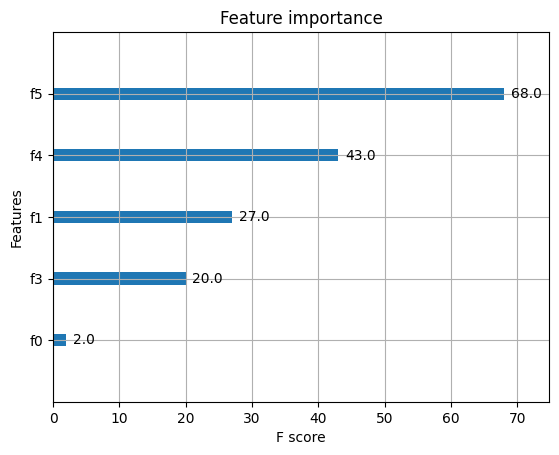

In [25]:
# splitting the data
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.25)
'''
Fitting the model 

    base_estimator: It is a weak learner used to train the model.|
    n_estimators: Number of weak learners to train in each iteration.
    learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

'''
dtrain = xgb.DMatrix(X_train , label = Y_train)
dtest = xgb.DMatrix(X_test , label = Y_test)

parameters = {
   "eta": 0.3,
   "objective": "multi:softprob",  # error evaluation for multiclass tasks
   "num_class": 3,  # number of classes to predic
   "max_depth": 3,  # depth of the trees in the boosting process
}

num_round = 20 # number of training iterations 

bst = xgb.train(parameters , dtrain  ,num_round)
preds = bst.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])

print(precision_score(Y_test, best_preds, average="macro"))
ax = xgb.plot_importance(bst)
ax.figure.savefig("fi.png")

In [26]:
parameters = {
   "eta": 0.3,
   "objective": "multi:softprob",  # error evaluation for multiclass tasks
   "num_class": 3,  # number of classes to predic
   "max_depth": 3,  # depth of the trees in the boosting process
}

num_round = 20 # number of training iterations 

iterations = [10,15,20,25,30,35,40,45,50]
eta = [0.1 , 0.2 , 0.3 , 0.4 , 0.5, 0.6 , 0.7 , 0.8 , 0.9]
num_class = 2
max_depth = [1,2,3,4,5,6,7,8,9,10]

accuracy_result = []
precision_result= []
recall_result =[]
f1_result = []
count=0
index=0
max_acc =0

best_model = 0



for number in iterations:
    for e in eta : 
        for depth in max_depth : 
            parameters = {
                "eta" : e,
                "objective" : "multi:softprob",
                "num_class" : 2,
                "max_depth" : depth
            }

            bst = xgb.train(parameters , dtrain  ,number)
            preds = bst.predict(dtest)
            best_preds = np.asarray([np.argmax(line) for line in preds])

            print("Number of iterations : ", number)
            #print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
            #print("Accuracy : " , round(metrics.accuracy_score(Y_test , best_preds)))
            #print("Precision score : " , metrics.pre)
            accuracy_result.append(round(metrics.accuracy_score(Y_test , best_preds) , 6))

            #print("Precsion score :  " , metrics.precision_score(Y_test , best_preds))
            precision_result.append(round(metrics.precision_score(Y_test , best_preds) , 6))

            #print("Recall score : " , metrics.recall_score(Y_test , best_preds))
            recall_result.append(round(metrics.recall_score(Y_test , best_preds) , 6))

            #print("F1 score : "  , metrics.f1_score(Y_test , best_preds))
            f1_result.append(round(metrics.f1_score(Y_test , best_preds) , 6))
        
            count = count +1

            if(round(metrics.accuracy_score(Y_test , best_preds) , 6)>max_acc) :
                max_acc = round(metrics.accuracy_score(Y_test , best_preds) , 6)
                index = count
                best_model = bst

print("Max Accuracy : " , accuracy_result[index])
print("Precision : " , precision_result[index])
print("Recall : " , recall_result[index])
print("F1 Score : " , f1_result[index])



            

Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
Number of iterations :  10
N

In [27]:
from sklearn.model_selection import cross_validate

def cross_validation(model , _X , _Y , _cv) :
    '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_Y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
    return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              } 

In [28]:
from sklearn.model_selection import cross_validate

def cross_validation(model , _X , _Y , _cv) :
    '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_Y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
    return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              } 

In [29]:
xgboost_result = cross_validation(best_model , X , Y , 14)
print(xgboost_result)

TypeError: estimator should be an estimator implementing 'fit' method, <xgboost.core.Booster object at 0x7f003c3d1f10> was passed

In [ ]:
model_name = "XGBoost Classifier"

plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            xgboost_result["Training Accuracy scores"],
            xgboost_result["Validation Accuracy scores"])

In [ ]:
# Plot Precision Result
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            xgboost_result["Training Precision scores"],
            xgboost_result["Validation Precision scores"])

In [ ]:
# Plot Recall Result
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            xgboost_result["Training Recall scores"],
            xgboost_result["Validation Recall scores"])

In [ ]:
# Plot F1-Score Result
plot_result(model_name,
            "F1",
            "F1 Scores in 5 Folds",
            xgboost_result["Training F1 scores"],
            xgboost_result["Validation F1 scores"])